# Descriptive statistics

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

/var/folders/2d/x4hpk9n158v35m8rlg82pjkc9qmk2t/T/ipykernel_14676/1131905708.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Reading the dataset

In [3]:
url = '../data/sysarmy_survey_2020_processed.csv'

# Or we can use this other URL if we are in google colab and we want to read the dataset directly from a server.
# url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'

df = pd.read_csv(url)

# Descriptive statistics

We've been organizing and visualizing data in different ways, but what insights can we get?

Visualizations such as histograms or tally charts show the number of times each value is observed in a set of realizations of a random variable. This is called frequency analysis and is part of **descriptive statistics**.

Visualizations limit us to estimates, but the raw data is too much to interpret together. For this, descriptive statistics also provides measures of central tendency and dispersion, which summarize properties of the realizations of the variable in a numerical value.

Let's go back to the original problem with the r.v. `salary_monthly_NET`.

In [4]:
df["salary_monthly_NET"].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NET, dtype: object

## Measures of central tendency

To obtain representative value realizations of a r.v., *measures of central tendency* are used.

Given X a path and a set of realizations $x = \{ x_1, x_2 ... \}$ where $x_i = X(\omega)$ for some $\omega \in \Omega$, and $N = |x|$:

* The **sample mean** (arithmetic) or average is calculated as:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* The **median** is calculated:
   1. Order the realizations such that $x_j \leq x_{j+1}$
   2. If the amount of data $N$ is odd, the median is the middle value: $median = x_{\lfloor N / 2 \rfloor +1}$
   3. If the amount of data $N$ is even, the median is the average of the two middle values: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* The **mode** are the values with the greatest frequency, that is, the ones that are repeated the most.


Consider a set of numbers:

numbers = [23, 29, 20, 32, 23, 21, 33, 25]

mean = sum(numbers)/len(numbers)

median = [20, 21, 23, 23, 25, 29, 32, 33] {average of 23, 25 = 24}

mode = 23 {23 is the number that appears the most}

In [5]:
df["salary_monthly_NET"].mean(), df["salary_monthly_NET"].median()

(94907.9491018188, 78000.0)

**Why are the two measurements so different?**

Mean properties:
* Can be interpreted as the histogram's *center of mass*. That is, if the histogram were a wooden figure, the balance point where we can support it, and it does not fall is the mean.
* It is susceptible to extreme values.

**Is it proper for these data?**

In [6]:
max_salaries = [df["salary_monthly_NET"].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df["salary_monthly_NET"] < max_salary]["salary_monthly_NET"].mean(),
     df[df["salary_monthly_NET"] < max_salary]["salary_monthly_NET"].median())
    for max_salary in max_salaries
]

print("highest salary", "mean salary", "median salary")
print(central_tendency)

highest salary mean salary median salary
[(2080000.0, 94570.46320401224, 77900.0), (1000000, 92698.81889747956, 77522.5), (500000, 88151.87028949175, 77000.0), (400000, 85670.7517838492, 76000.0), (300000, 82071.23510452472, 75000.0), (200000, 77205.32366377125, 74824.5)]


These numbers can be plotted to get a better intuition of the magnitude of the differences. Also, displaying a visualization can include more points.

In order to create seaborn charts with different sets of data, it is often necessary to change the format of the dataframe from wide to long. See [this link](https://anvil.works/blog/tidy-data) for more information.

In [7]:
central_tendency_max = [
    (max_salary, df[df["salary_monthly_NET"] < max_salary]["salary_monthly_NET"].mean(),
     df[df["salary_monthly_NET"] < max_salary]["salary_monthly_NET"].median())
    for max_salary in range(50000, int(df["salary_monthly_NET"].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,31760.877295
1,60000,mean,38301.665653
2,70000,mean,44085.591719


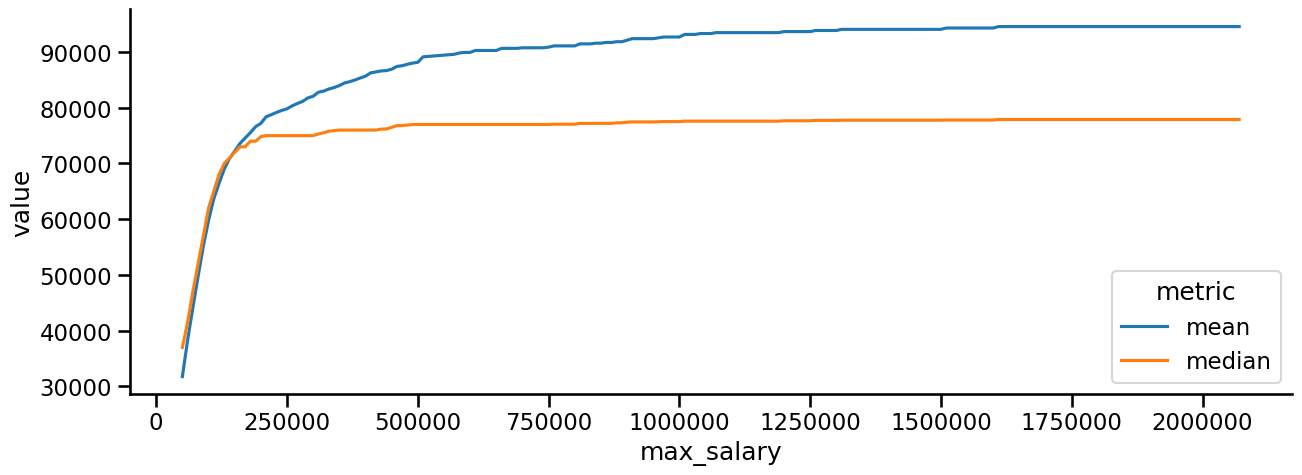

In [8]:
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

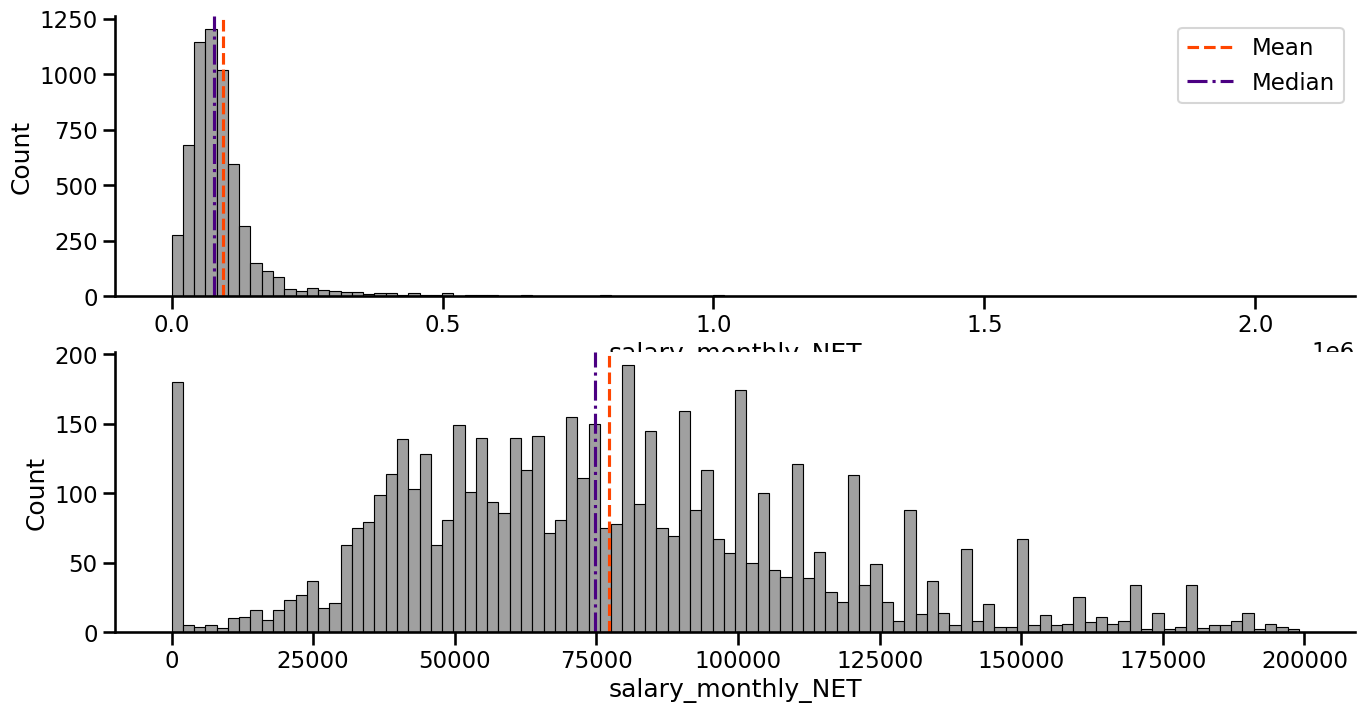

In [9]:
## The difference is not always visible on the charts
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(df["salary_monthly_NET"], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df["salary_monthly_NET"].mean(), color='orangered',
            linestyle='--', label='Mean')
axes[0].axvline(df["salary_monthly_NET"].median(), color='indigo',
            linestyle='-.', label='Median')

filtered_df = df[df["salary_monthly_NET"] < 200000]
seaborn.histplot(filtered_df["salary_monthly_NET"], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df["salary_monthly_NET"].mean(), color='orangered',
            linestyle='--', label='Mean')
axes[1].axvline(filtered_df["salary_monthly_NET"].median(), color='indigo',
            linestyle='-.', label='Median')

axes[0].legend()
seaborn.despine()

## Measures of dispersion

The most used measures of dispersion are standard deviation, variance, and variance coefficient. They permit to represent properties of our data with one number.



-10, 0, 10, 20, 30  vs   8, 9, 10, 11, 12

average = 10                 10

but one is more disperse than the other?

range =  (30-(-10)) = 40      12-8 = 4



For example, let's compare the net salary with the gross one. Do you think we should note any difference?

In [10]:
df[['salary_monthly_NET', 'salary_monthly_GROSS']].describe().round()

,salary_monthly_NET,salary_monthly_GROSS
count,5883.0,6095.0
mean,94908.0,124059.0
std,96862.0,122912.0
min,1.0,1.0
25%,51480.0,61595.0
50%,78000.0,96000.0
75%,106000.0,145000.0
max,2080000.0,2180000.0


## Removing outliers

## Using percentiles 

One possible approach to delete outliers that affect the measures of centrality (mean, median, and visualizations) is to find an extreme percentage of our data through percentiles.

For example, we can retain the 99% lowest salaries and eliminate the remaining 1%. We can calculate all the possible percentiles to decide which is appropriate.

In [11]:
k = 90
percentil_90 = df["salary_monthly_NET"].quantile(k / 100)
nof_below = len(df[df["salary_monthly_NET"] <= percentil_90])
nof_above = len(df[df["salary_monthly_NET"] > percentil_90])
print('Percentil {} of the column {}: {}'.format(k, "salary_monthly_NET", percentil_90))
print('% of data below the percentil {}: {}'.format(k, nof_below / len(df)))
print('% of data above the percentil {}: {}'.format(k, nof_above / len(df)))

Percentil 90 of the column salary_monthly_NET: 150000.0
% of data below the percentil 90: 0.8698933552091879
% of data above the percentil 90: 0.09532403609515996


In [12]:
df["salary_monthly_NET"].quantile([.95, .98, .99, .995, .998])

0.950    210000.00
0.980    370000.00
0.990    491800.00
0.995    650000.00
0.998    955289.52
Name: salary_monthly_NET, dtype: float64

<Axes: xlabel='salary_monthly_NET'>

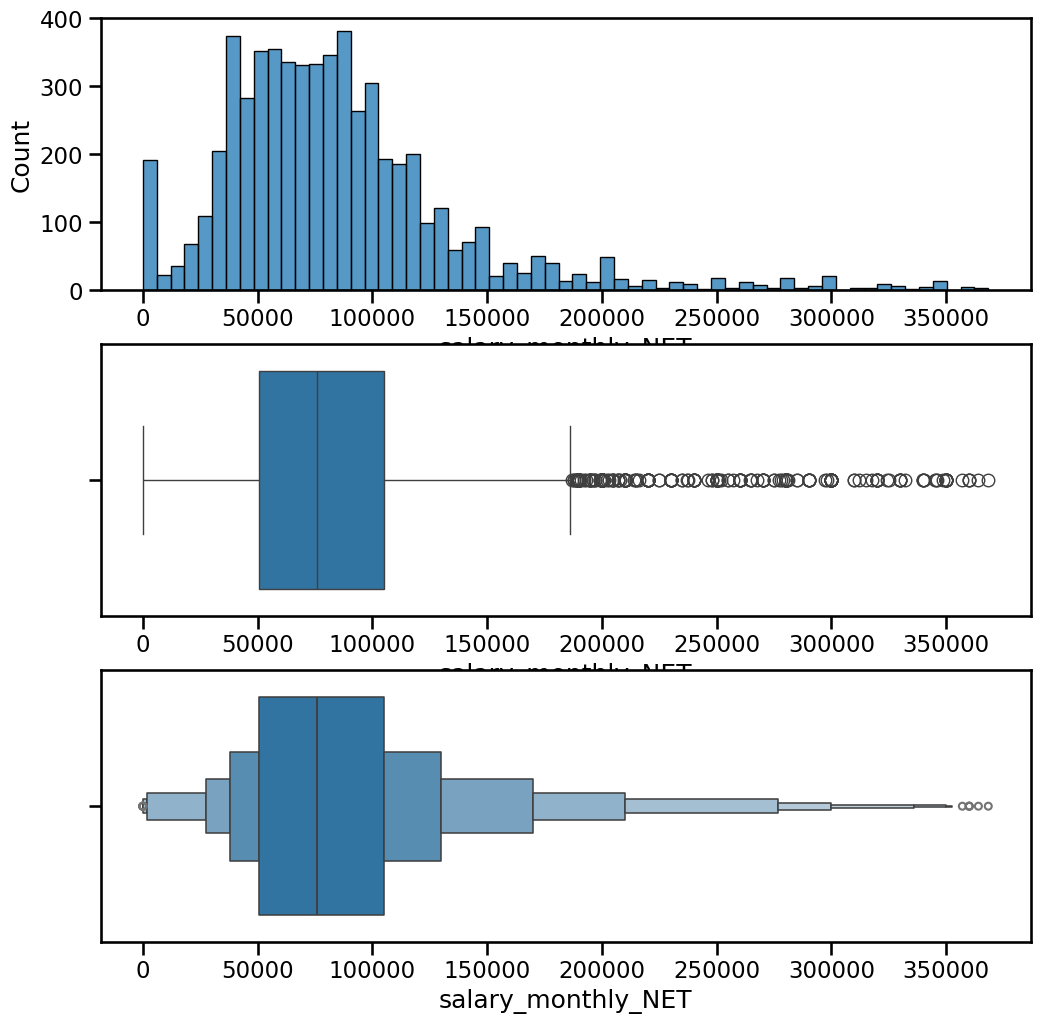

In [13]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df["salary_monthly_NET"].quantile(.98)
data = df[df["salary_monthly_NET"] < max_limit]["salary_monthly_NET"]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

In [21]:
df[df["salary_monthly_NET"] < max_limit]["salary_monthly_NET"].describe()

count      5764.000000
mean      84693.019009
std       52928.345117
min           1.000000
25%       50678.000000
50%       76000.000000
75%      105000.000000
max      368300.000000
Name: salary_monthly_NET, dtype: float64

## Using interquartile range

In [15]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (1.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_NET', ylabel='Count'>

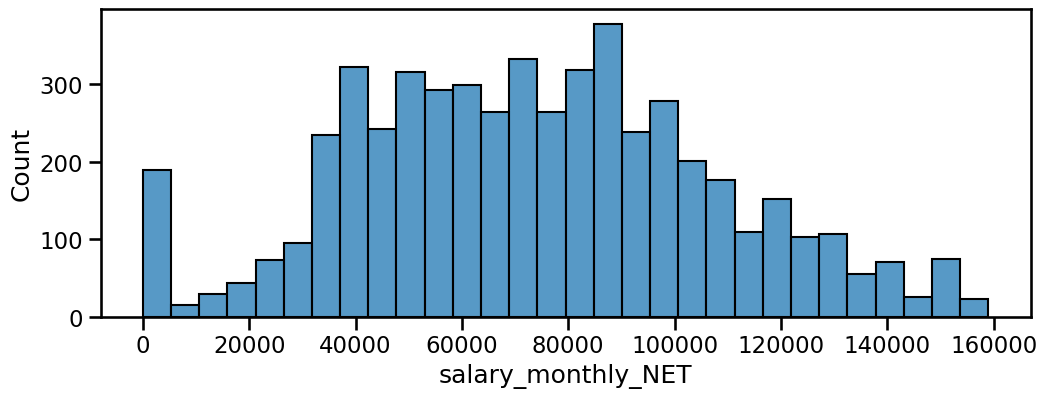

In [16]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, "salary_monthly_NET")["salary_monthly_NET"]
seaborn.histplot(x=data)

In [17]:
def clean_outliers_std(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_NET', ylabel='Count'>

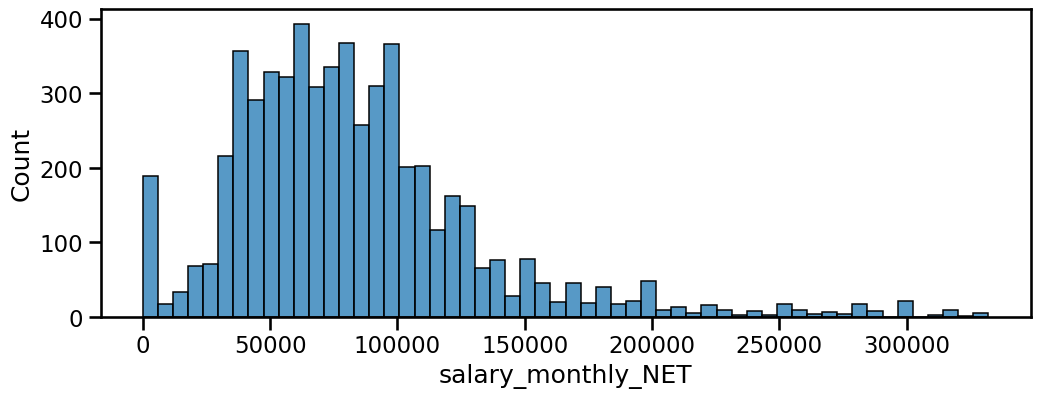

In [18]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_std(df, "salary_monthly_NET")["salary_monthly_NET"]
seaborn.histplot(x=data)

### Don't forget to check what you're removing!

Who are the ones with a high salary?

In [19]:
df[df["salary_monthly_NET"] > df["salary_monthly_NET"].quantile(0.98)]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
261,Male,37,Argentina,Ciudad Autónoma de Buenos Aires,21.0,10.0,10.0,17,University,Incomplete,...,3+ salaries,One,20.0,4,Never,NaN,5001-10000,Software based product,9,9
267,Other,40,Argentina,Provincia de Buenos Aires,20.0,0.0,0.0,0,University,Incomplete,...,One salary,No,0.0,0,Never,No,1-10,Software based product,9,10
303,Male,34,Argentina,Provincia de Buenos Aires,10.0,2.0,8.0,0,University,Incomplete,...,No,No,0.0,0,In a previous job,No,201-500,Services / Software Consulting / Digital,10,7
318,Male,40,Argentina,Santa Fe,4.0,0.0,0.0,0,Postdoc,Complete,...,No,No,0.0,0,Never,NaN,1001-2000,Services / Software Consulting / Digital,8,10
437,Male,36,Argentina,Ciudad Autónoma de Buenos Aires,17.0,4.0,4.0,15,University,Incomplete,...,One salary,No,0.0,0,In a previous job,No,1001-2000,Software based product,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,Male,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,1.0,1.0,1,Terciary,Complete,...,Less than a salary,No,0.0,0,Never,NaN,201-500,Software based product,9,9
5819,Male,35,Argentina,Ciudad Autónoma de Buenos Aires,10.0,10.0,10.0,0,University,Ongoing,...,Less than a salary,Two,23.0,7,Never,NaN,2001-5000,Other industries,9,8
5878,Male,54,Argentina,Ciudad Autónoma de Buenos Aires,36.0,34.0,8.0,2500,Postgraduate,Complete,...,No,Two,20.0,7,Never,NaN,10001+,Other industries,7,5
6024,Male,39,Argentina,Santa Fe,18.0,2.0,2.0,0,University,Complete,...,No,No,0.0,0,Never,NaN,101-200,Software based product,7,9
